## Install Dependencies

In [1]:
!pip install opencv-python openai Pillow


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## Import Libraries 

In [30]:
from openai import OpenAI
import cv2, os, base64, time
from IPython.display import display, Image, Audio
from PIL import Image as Image_2
from io import BytesIO

## Setup Initial Parameters

In [3]:
video_path = "data/meme-video.mp4"
nth_frame = 5
openai_api_key = os.environ["OPENAI_API_KEY"]
resized_width = 500  # Replace with your desired width
resized_height = 500  # Replace with your desired height

## Get The Video Frames

In [4]:
video = cv2.VideoCapture(video_path) 

In [5]:
# store frames in an array in text format
base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(f"Total frames: {len(base64Frames)}")

Total frames: 144


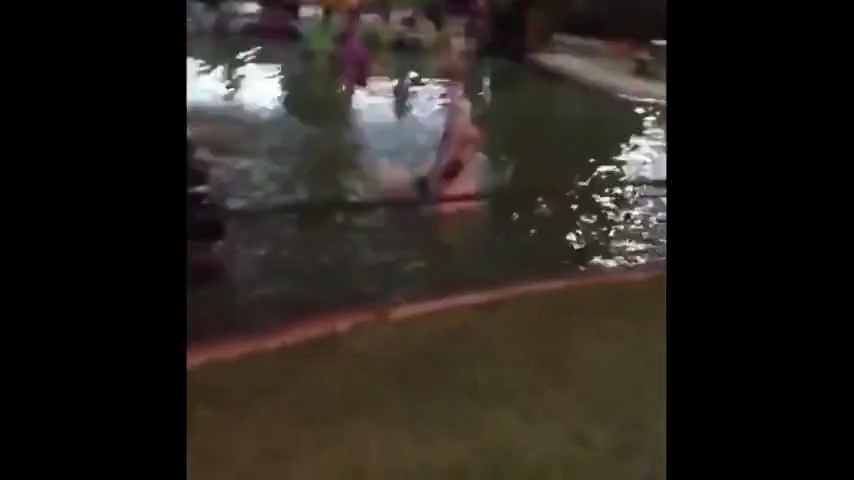

In [7]:
# Check all the images by displaying them sequentially
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

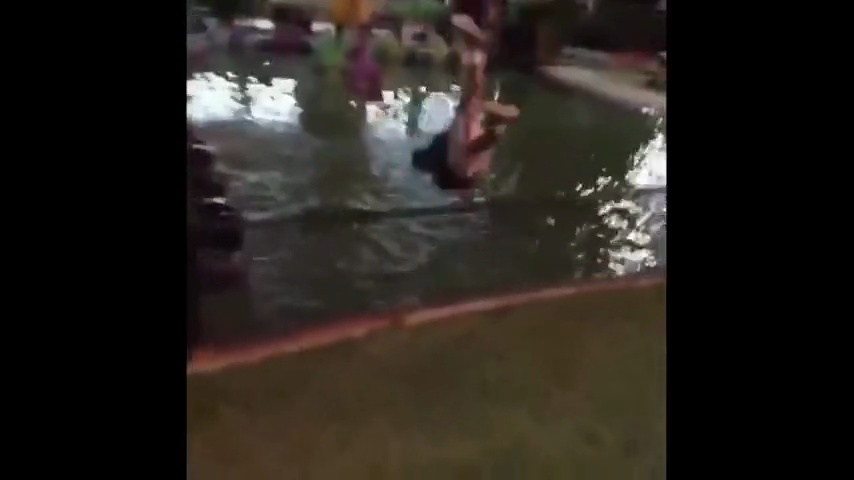

In [12]:
# Extract every nth frame:
trimmed_frames = base64Frames[::nth_frame]
display_handle = display(None, display_id=True)
for img in trimmed_frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025 * nth_frame)

In [13]:
# Resize images
def resize_image(base64_string, width, height):
    image_data = base64.b64decode(base64_string.encode('utf-8'))
    img = Image_2.open(BytesIO(image_data))
    img = img.resize((width, height))
    buffered = BytesIO()
    img.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

## Constructing The Prompt

In [14]:
text_prompt = f"Here's every nth frame from a video (where n={nth_frame}). Please create a compelling explanation of what takes place in the video?"

In [16]:
text_prompt_entry = {"type": "text", "text": text_prompt}

In [17]:
image_entries = [
    {
        "type": "image_url",
        "image_url": { 
            "url": f"data:image/jpeg;base64, {resize_image(frame, resized_width, resized_height)}"
        }
    } for frame in trimmed_frames
]

In [18]:
# Combine all entries into the final array
messages = [
      {
        "role": "user",
        "content": [text_prompt_entry] + image_entries
      }
    ]

In [37]:
params = {
    "model": "gpt-4-vision-preview",
    "messages": messages,
    "max_tokens": 500,
}

In [40]:
client = OpenAI(
    api_key=openai_api_key
)
result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

Since the images provided appear to be sequential frames from a video, we can infer the following series of events taking place:

1. The initial frames show an individual positioning themselves next to a mini-golf course, holding a golf club and preparing for a putt.
2. Subsequent images seem to capture the moment the individual takes their putt, with the goal likely to be getting the golf ball into a hole located at the end of the course.
3. The images following the putt show a blur that indicates motion, suggesting the ball is in motion along the course.
4. Later frames depict the golf ball near the edge of the course, possibly implying that the putt was either too strong, leading the ball to exit the course bounds, or that something unexpected occurred during the ball's travel.
5. The final set of images capture the individual's reaction, turning away from the course and walking in the direction of a fountain or water feature nearby, possibly indicating either an end to their turn o